In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import nan

# About the Data Set

Data downloaded from: https://www.healthdata.gov/dataset/home-health-care-agencies

About the data set: "A list of all Home Health Agencies that have been registered with Medicare. The list includes addresses, phone numbers, and quality measure ratngs for each agency."

The goal: This data set includes data on all home health agencies that are registered with Medicare, and the goal of this analysis is to explore what characteristics of a home health agency or quality metrics are predictive of high levels of hospital admissions and readmissions.

In [19]:
home_health = pd.read_csv('Home_Health_Care_Agencies.csv')

# Exploring The Data

In [20]:
home_health.loc[0]

State                                                                                                                                                                                                                      AL
CMS Certification Number (CCN)*                                                                                                                                                                                         17000
Provider Name                                                                                                                                                                             BUREAU OF HOME & COMMUNITY SERVICES
Address                                                                                                                                                                         201 MONROE STREET, THE RSA TOWER,  SUITE 1200
City                                                                                                            

In [21]:
home_health.shape

(12159, 66)

In [22]:
home_health['Type of Ownership'].value_counts()

Proprietary                                        9743
Non - Profit Private                                867
Non - Profit Other                                  593
Non - Profit Religious                              385
Government - State/ County                          383
Government - Local                                  176
Government - Combination Government & Voluntary      12
Name: Type of Ownership, dtype: int64

In [23]:
home_health['State'].value_counts()

TX    2617
CA    1272
FL    1135
OH     783
IL     758
MI     627
PA     427
OK     265
VA     236
IN     233
MA     225
LA     205
MN     202
CO     184
NC     177
AR     172
MO     171
AZ     164
IA     162
AL     151
NY     149
TN     141
NV     138
WI     117
KS     114
GA     106
KY     104
UT      99
CT      90
NM      78
NE      75
SC      72
WA      64
WV      60
OR      58
MD      53
NJ      47
ID      46
MS      46
PR      45
SD      33
NH      33
DC      27
RI      27
MT      27
WY      26
ME      26
DE      24
ND      19
HI      17
AK      13
VT      11
GU       4
MP       2
VI       2
Name: State, dtype: int64

In [24]:
home_health['Quality of Patient Care Star Rating'].value_counts()

Not Available    2820
3.5              1992
3                1935
2.5              1564
4                1526
2                 884
4.5               834
5                 317
1.5               273
1                  14
Name: Quality of Patient Care Star Rating, dtype: int64

# Exploring Dependent Variables

Predict admissions/readmission:
- How often home health patients had to be admitted to the hospital
- How often home health patients, who have had a recent hospital stay, had to be re-admitted to the hospital

In [25]:
home_health['How often home health patients had to be admitted to the hospital'].value_counts()

16.7    125
17.1    120
16.3    120
15.8    116
15.3    114
15.0    109
16.1    108
14.8    107
16.0    107
16.5    107
17.5    106
16.2    105
16.6    103
14.9    103
15.2    102
15.5    101
16.9    101
15.6     99
14.5     98
15.9     97
16.4     96
17.6     95
14.6     93
14.3     93
17.2     93
14.7     92
15.4     92
15.7     91
16.8     91
14.4     88
       ... 
31.2      1
32.6      1
31.8      1
30.6      1
38.7      1
30.5      1
31.5      1
32.5      1
3.9       1
29.1      1
2.8       1
36.3      1
27.9      1
0.9       1
35.7      1
34.9      1
30.1      1
36.7      1
2.2       1
27.6      1
3.2       1
36.6      1
6.0       1
5.0       1
2.0       1
33.0      1
30.0      1
29.0      1
3.0       1
32.1      1
Name: How often home health patients had to be admitted to the hospital, dtype: int64

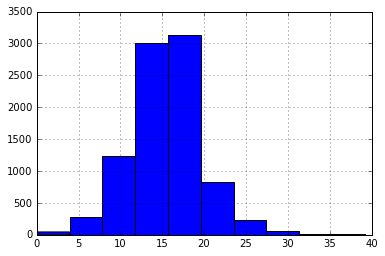

In [26]:
home_health['How often home health patients had to be admitted to the hospital'].hist()

In [27]:
home_health['How often home health patients, who have had a recent hospital stay, had to be re-admitted to the hospital'].value_counts()

Same As Expected        5898
Not Available           5342
Better Than Expected     494
Worse Than Expected      425
Name: How often home health patients, who have had a recent hospital stay, had to be re-admitted to the hospital, dtype: int64

## Explore NaN and missing values in 2 Dependent Variables

In [28]:
q1_missing = home_health['How often home health patients had to be admitted to the hospital'].isnull().sum()
print(q1_missing)
q1_missing_percent = (float(q1_missing) / home_health.shape[0]) * 100
print(q1_missing_percent)

3325
27.3459988486


In [29]:
q2_missing = home_health['How often home health patients, who have had a recent hospital stay, had to be re-admitted to the hospital'].value_counts()['Not Available']
print(q2_missing)
q2_missing_percent = (float(q2_missing) / home_health.shape[0]) * 100
print(q2_missing_percent)

5342
43.93453409


## How many rows are missing both dependent variables?

In [30]:
q1_missing_data = home_health[home_health['How often home health patients had to be admitted to the hospital'].isnull()]

In [31]:
q2_missing_data = home_health[home_health['How often home health patients, who have had a recent hospital stay, had to be re-admitted to the hospital']=='Not Available']

## Use list comprehensions to determine: 
Number of rows with q1_missing only

Number of rows with q2_missing only

Number of rows with both q1_missing and q2_missing


# Explore footnotes for Q1

Footnotes provide information related to why a value is missing or not available

In [32]:
home_health['Footnote for how often home health patients, who have had a recent hospital stay, had to be re-admitted to the hospital'].value_counts()

The number of patient episodes for this measure is too small to report.                                         3825
This measure currently does not have data or provider has been certified/recertified for less than 6 months.    1517
Name: Footnote for how often home health patients, who have had a recent hospital stay, had to be re-admitted to the hospital, dtype: int64

# Explore footnotes for Q2

In [33]:
home_health['Footnote for how often home health patients had to be admitted to the hospital'].value_counts()

The number of patient episodes for this measure is too small to report.                                         2176
This measure currently does not have data or provider has been certified/recertified for less than 6 months.    1149
Name: Footnote for how often home health patients had to be admitted to the hospital, dtype: int64

## Computing correlation between 2 dependent variables

Q1 is continuous

Q2 is categorical

Need to convert Q1 to categorical

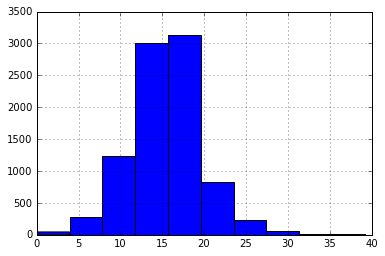

In [34]:
home_health['How often home health patients had to be admitted to the hospital'].hist()

Categorical variable has 3 categories (Same As Expected, Better Than Expected, Worse Than Expected)

## What is the expected % for 'How often home health patients had to be admitted to the hospital'?

# To Do

- Look at correlation between continuous variables
- Look at correlation between categorical variables
- Pick features and complete logistic regression with each feature
- Rank top 5-10 features